In [28]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [3]:
vader_analyzer = SentimentIntensityAnalyzer()

In [4]:
ign = pd.read_csv("../../../Data/Final Dataset /IGN/IGN_Final.csv")
metacritic = pd.read_csv("../../../Data/Final Dataset /Metacritic/Metacritic_Final.csv")
psblog = pd.read_csv("../../../Data/Final Dataset /PSBlog/PSBlog_Final.csv")
reddit = pd.read_csv("../../../Data/Final Dataset /Reddit/Reddit_Final.csv")

In [5]:
print(ign.shape)
print(metacritic.shape)
print(psblog.shape)
print(reddit.shape)

(41795, 5)
(4803, 10)
(13350, 5)
(171358, 5)


In [6]:
print(ign.columns)
print("- - - - - - ")
print(metacritic.columns)
print("- - - - - - ")
print(psblog.columns)
print("- - - - - - ")
print(reddit.columns)

Index(['Author', 'Timestamp', 'Comment', 'Article', 'Game Title'], dtype='object')
- - - - - - 
Index(['Game Title', 'Console', 'Commenter Name', 'Reviewer Type', 'Comment',
       'Date Commented', 'Score Number', 'Release Date', 'Description',
       'Game Link'],
      dtype='object')
- - - - - - 
Index(['Author', 'Timestamp', 'Comment', 'Article Link', 'Platform'], dtype='object')
- - - - - - 
Index(['Author', 'Timestamp', 'Comment', 'Title', 'Upvotes'], dtype='object')


In [7]:
all_data = pd.concat([ign, metacritic, psblog, reddit], ignore_index=True)

all_data.shape, all_data.columns

((231306, 17),
 Index(['Author', 'Timestamp', 'Comment', 'Article', 'Game Title', 'Console',
        'Commenter Name', 'Reviewer Type', 'Date Commented', 'Score Number',
        'Release Date', 'Description', 'Game Link', 'Article Link', 'Platform',
        'Title', 'Upvotes'],
       dtype='object'))

---

### I noticed a lot of nulls testing here 💔

In [8]:
all_data['Comment'].shape, all_data['Comment'].isnull().sum()

((231306,), 2922)

In [15]:
metacritic['Comment'].shape, metacritic['Comment'].isnull().sum()

((4803,), 2578)

In [16]:
psblog['Comment'].shape, psblog['Comment'].isnull().sum()

((13350,), 1)

In [17]:
reddit['Comment'].shape, reddit['Comment'].isnull().sum()

((171358,), 343)

In [18]:
ign['Comment'].shape, ign['Comment'].isnull().sum()

((41795,), 0)

### 🤷‍♂️ They add up so good enough 
---

In [19]:
def analyze_sentiment_vader(text):
    compound_score = vader_analyzer.polarity_scores(str(text))['compound']
    
    if compound_score >= 0.05:
        return 'Positive'
    elif -0.05 < compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

In [20]:
all_data["Vader_Score"] = all_data["Comment"].apply(analyze_sentiment_vader)

In [21]:
all_data["Vader_Score"].value_counts()

Vader_Score
Positive    123703
Neutral      54798
Negative     52805
Name: count, dtype: int64

In [23]:
all_data.shape

(231306, 18)

# Vizzz 📊
***but not so fancy stuff***

In [24]:
sentiment_counts = all_data['Vader_Score'].value_counts()

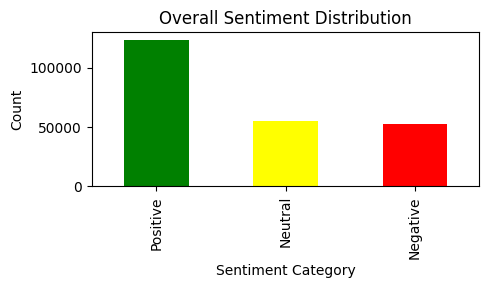

In [30]:
plt.figure(figsize=(5, 2))
sentiment_counts.sort_values(ascending=False).plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()